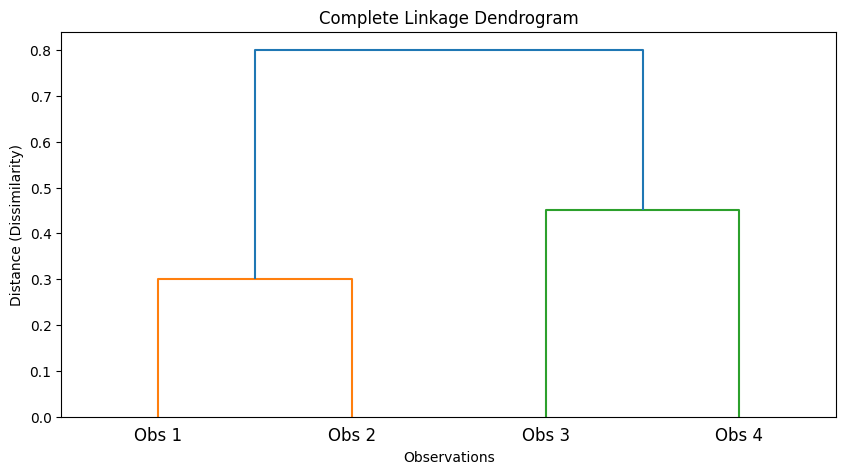

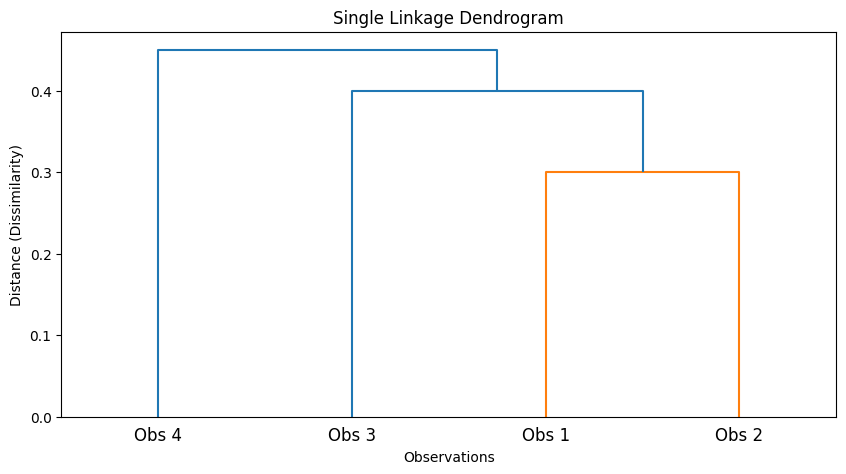

Clusters from complete linkage (two clusters):
Cluster 1: ['Obs1', 'Obs2']
Cluster 2: ['Obs3', 'Obs4']
Clusters from single linkage (two clusters):
Cluster 1: ['Obs1', 'Obs2', 'Obs3']
Cluster 2: ['Obs4']


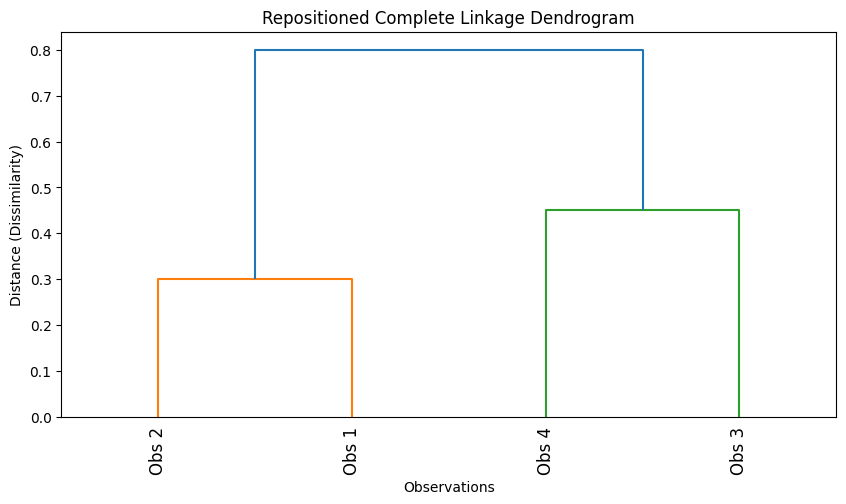

In [10]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

dissimilarity_matrix = np.array([[0.0, 0.3, 0.4, 0.7],
                                 [0.3, 0.0, 0.5, 0.8],
                                 [0.4, 0.5, 0.0, 0.45],
                                 [0.7, 0.8, 0.45, 0.0]])
condensed_matrix = sch.distance.squareform(dissimilarity_matrix)

# (a) Plot dendrogram using complete linkage
plt.figure(figsize=(10, 5))
plt.title("Complete Linkage Dendrogram")
Z_complete = sch.linkage(condensed_matrix, method='complete')
sch.dendrogram(Z_complete, labels=['Obs 1', 'Obs 2', 'Obs 3', 'Obs 4'])
plt.xlabel("Observations")
plt.ylabel("Distance (Dissimilarity)")
plt.show()

# (b) Plot dendrogram using single linkage
plt.figure(figsize=(10, 5))
plt.title("Single Linkage Dendrogram")
Z_single = sch.linkage(condensed_matrix, method='single')
sch.dendrogram(Z_single, labels=['Obs 1', 'Obs 2', 'Obs 3', 'Obs 4'])
plt.xlabel("Observations")
plt.ylabel("Distance (Dissimilarity)")
plt.show()

observation_names = ['Obs1', 'Obs2', 'Obs3', 'Obs4']

# (c) Form 2 clusters from complete linkage and map results to observation names
clusters_complete = fcluster(Z_complete, t=2, criterion='maxclust')
clustered_complete = {i: [] for i in set(clusters_complete)}
for i, cluster in enumerate(clusters_complete):
    clustered_complete[cluster].append(observation_names[i])

print("Clusters from complete linkage (two clusters):")
for cluster_id, obs in clustered_complete.items():
    print(f"Cluster {cluster_id}: {obs}")

# (d) Form 2 clusters from single linkage and map results to observation names
clusters_single = fcluster(Z_single, t=2, criterion='maxclust')
clustered_single = {i: [] for i in set(clusters_single)}
for i, cluster in enumerate(clusters_single):
    clustered_single[cluster].append(observation_names[i])

print("Clusters from single linkage (two clusters):")
for cluster_id, obs in clustered_single.items():
    print(f"Cluster {cluster_id}: {obs}")

# (e) Reposition leaves in the complete linkage dendrogram without changing clustering
plt.figure(figsize=(10, 5))
plt.title("Repositioned Complete Linkage Dendrogram")
sch.dendrogram(Z_complete, labels=['Obs 2', 'Obs 1', 'Obs 4', 'Obs 3'], leaf_rotation=90)
plt.xlabel("Observations")
plt.ylabel("Distance (Dissimilarity)")
plt.show()
